<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/44_Percentile_Method_Outlier_Detectioin_%26_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0


In [7]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [8]:
import seaborn as sns

/tmp/ipython-input-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

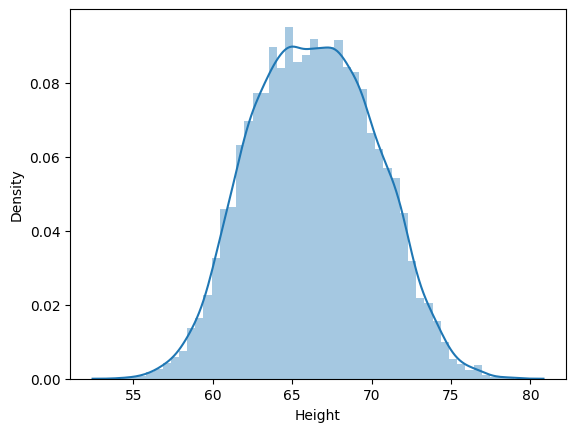

In [9]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

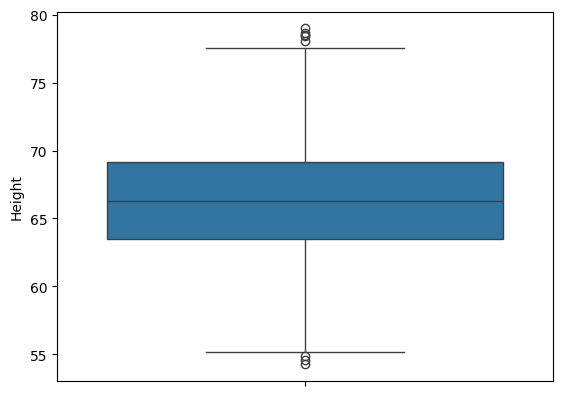

In [10]:
sns.boxplot(df['Height'])

In [12]:
upper_limit = df['Height'].quantile(0.99) #99 percent ke upar jo bhi hai sab outliers consider kara hai
upper_limit

np.float64(74.7857900583366)

In [14]:
#Note: Agar upper limit me 100-99 = 1 xora hai to idhar bhi 1 ka hi difference rakhna padega
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [20]:
#Outliers
outliers = df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

In [21]:
outliers

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# #Trimming

In [27]:
new_df = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]

In [23]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


/tmp/ipython-input-1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

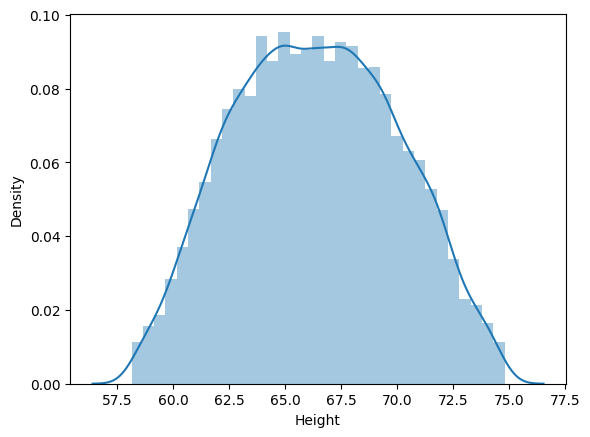

In [24]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

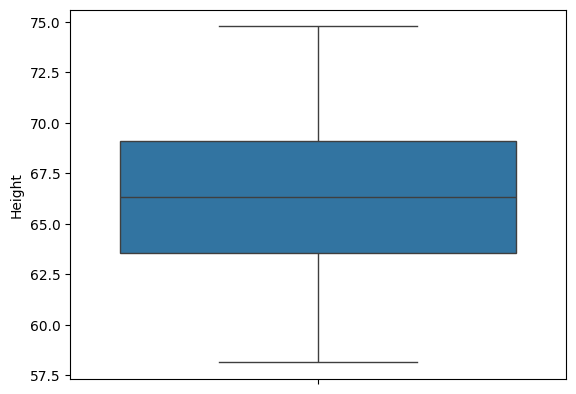

In [26]:
sns.boxplot(new_df['Height']) #No outliers detected

# #Capping ----> Winsorization

In [30]:
np.where(df['Height'] >= upper_limit,upper_limit,np.where(
    df['Height'] <= lower_limit, lower_limit,df['Height']
))

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [31]:
df.shape

(10000, 3)

In [33]:
new_df['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714
